In [138]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
%matplotlib inline

In [163]:
file_path = "bikes_rent.csv"
data = pd.read_csv(file_path)

print(data.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


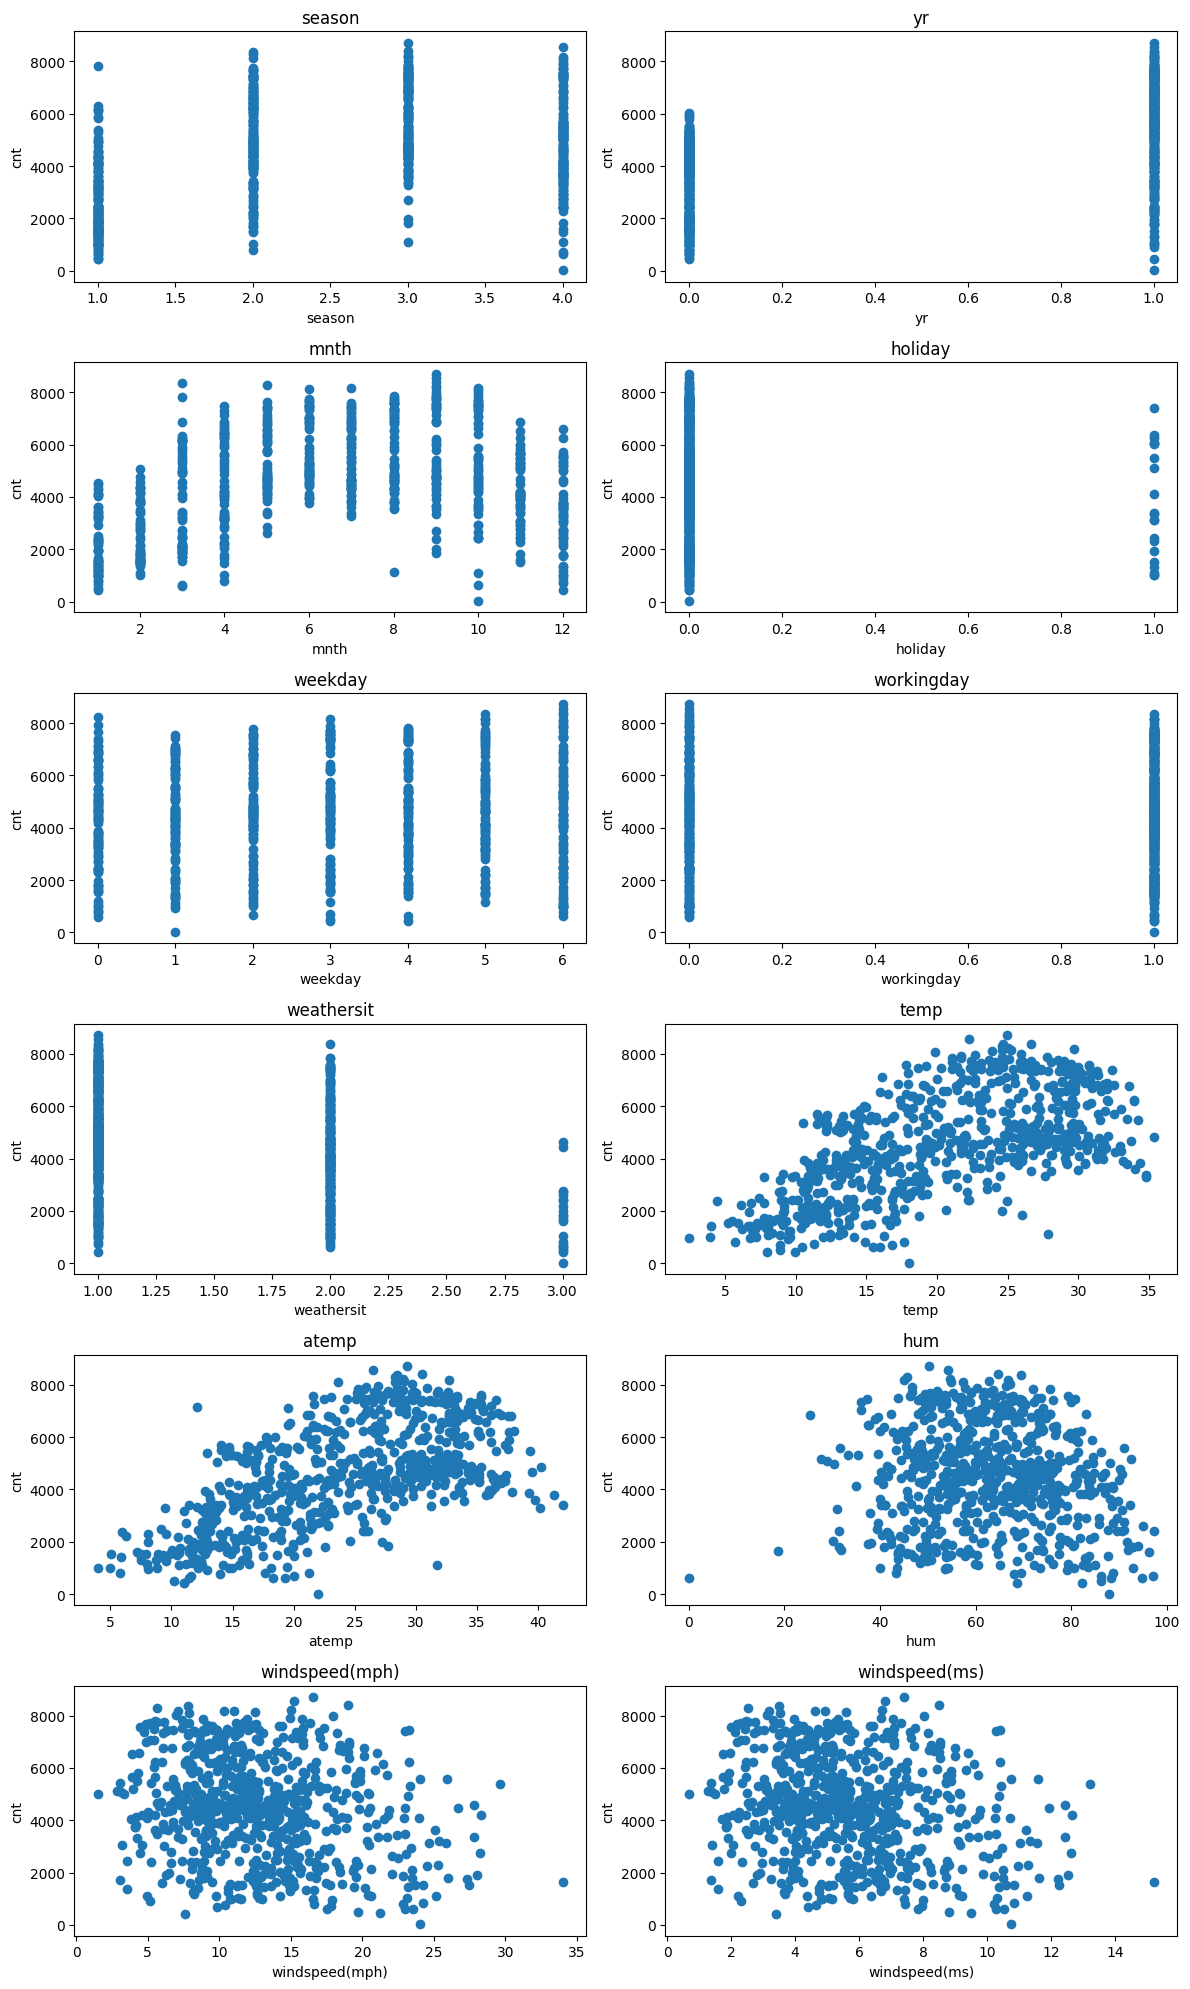

In [164]:
plt.figure(figsize=(12, 20))
for i, column in enumerate(data.columns[:-1]): # Припускаємо, що останній стовпець - це cnt
    plt.subplot(6, 2, i + 1) 
    plt.scatter(data[column], data['cnt']) 
    plt.title(column)
    plt.xlabel(column) # Позначення осі X
    plt.ylabel('cnt') # Позначення осі Y
    plt.tight_layout()

plt.show()

1. Каков характер зависимости числа прокатов от месяца?
Відповідь: Константна
2. Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
Відповідь: температура, відчувана температура 

In [165]:
# Розрахунок кореляцій
correlations = data.iloc[:, :-1].corrwith(data.iloc[:, -1]).sort_values(ascending=False)

# Виведення результатів
print(correlations)

atemp             0.631066
temp              0.627494
yr                0.566710
season            0.406100
mnth              0.279977
weekday           0.067443
workingday        0.061156
holiday          -0.068348
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
weathersit       -0.297391
dtype: float64


In [166]:
# Вибірка необхідних стовпців для кореляції
selected_columns = data[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]

# Розрахунок попарних кореляцій між вибраними стовпцями
pairwise_correlations = selected_columns.corr().sort_index()

# Виведення результатів
print(pairwise_correlations)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   

                     cnt  
atemp           0.631066  
cnt             1.000000  
hum            -0.100659  
temp            0.627494  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  


In [167]:
# Розрахунок середніх значень для кожного признаку
mean_values = data.mean().sort_index()

# Виведення результатів
print(mean_values)

atemp               23.717699
cnt               4504.348837
holiday              0.028728
hum                 62.789406
mnth                 6.519836
season               2.496580
temp                20.310776
weathersit           1.395349
weekday              2.997264
windspeed(mph)      12.762576
windspeed(ms)        5.705220
workingday           0.683995
yr                   0.500684
dtype: float64


In [168]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [169]:
data_shuffled = shuffle(data, random_state=42)
X = scale(data_shuffled[data_shuffled.columns[:-1]])
y = data_shuffled["cnt"]
data_shuffled

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
703,4,1,12,0,2,1,1,19.509153,23.45270,73.3750,11.666643,5.215308,6606
33,1,0,2,0,4,1,1,7.665237,8.89390,43.7826,18.609384,8.318902,1550
300,4,0,10,0,5,1,2,13.564153,15.94060,58.5833,15.375093,6.873086,3747
456,2,1,4,0,0,0,2,17.459153,20.86435,67.6250,11.541889,5.159539,6041
633,4,1,9,0,2,1,1,22.550000,27.20895,57.0000,15.833507,7.078009,7538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,3,0,0,0,1,15.758268,19.00455,52.7391,18.130468,8.104814,2417
106,2,0,4,0,0,0,1,18.723347,22.28480,47.9583,20.334232,9.089956,3744
270,4,0,9,0,3,1,2,26.035000,28.75790,84.8750,9.958143,4.451561,3907
435,1,1,3,0,0,0,1,14.831299,17.98350,47.6957,14.913329,6.666665,4911


In [170]:
regressor = LinearRegression().fit(X, y)

# Отримання ваг моделі
weights = regressor.coef_

# Отримання назв признаків
feature_names = data.columns[:-1]

# Використання функції zip для створення пар "назва признака - вага"
feature_weights = zip(feature_names, weights)

#list(zip(feature_names, weights))
for feature, weight in feature_weights:
    print(f"{feature}: {weight}")

season: 570.863641661725
yr: 1021.9604245185086
mnth: -141.3006331900142
holiday: -86.75760471139698
weekday: 137.2272583151452
workingday: 56.38980357474366
weathersit: -330.2271825899341
temp: 367.4799030832653
atemp: 585.5521797658965
hum: -145.6155228231448
windspeed(mph): 12454356291009.727
windspeed(ms): -12454356291208.188


In [171]:
# Створення об'єкта лассо-регресора з параметром регуляризації alpha
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X, y)

# Виведення ваг
for feature, weight in zip(data.columns, lasso_regressor.coef_):
    print(f"{feature}: {weight}")
print(f"w0: ", lasso_regressor.intercept_)

season: 560.2416160308861
yr: 1019.4634940657196
mnth: -128.73062703678696
holiday: -86.15278133371106
weekday: 137.34789390496314
workingday: 55.21237064135668
weathersit: -332.3698569623487
temp: 376.3632362096943
atemp: 576.530793504555
hum: -144.12915500348583
windspeed(mph): -197.1396894024843
windspeed(ms): -2.8051404183533485e-08
w0:  4504.3488372093025


In [172]:
# Створення об'єкта гребневого регресора з параметром регуляризації alpha
ridge_regressor = Ridge(alpha=2.5)
ridge_regressor.fit(X, y)

# Виведення ваг
ridge_weights = list(zip(data.columns[:-1], ridge_regressor.coef_))

for feature, weight in ridge_weights:
    print(f"{feature}: {weight}")
print(f"w0: ", ridge_regressor.intercept_)

season: 558.8941473821461
yr: 1016.8562563552429
mnth: -128.05332130212946
holiday: -86.78844020475809
weekday: 137.52216195582704
workingday: 55.834099336048446
weathersit: -331.7801984871038
temp: 402.44620504442094
atemp: 550.0393331212347
hum: -145.23090514623183
windspeed(mph): -99.51372439565722
windspeed(ms): -99.51372442444945
w0:  4504.3488372093025


In [173]:
alphas = np.arange(5, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)

for alpha in alphas:
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
print(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)
print(coefs_ridge)

[[ 5.37663473e+02  1.01594090e+03 -1.05777725e+02 -8.38656235e+01
   1.33473289e+02  5.22881815e+01 -3.30921742e+02  3.71796493e+02
   5.80443711e+02 -1.40831953e+02 -1.92844615e+02 -2.71148166e-08]
 [ 4.07683911e+02  9.73727389e+02 -0.00000000e+00 -5.05643393e+01
   8.85088526e+01  1.44502745e+01 -3.17236633e+02  3.18687811e+02
   6.11798737e+02 -8.60538472e+01 -1.41003306e+02 -2.31091779e-08]
 [ 3.66817518e+02  9.32664770e+02  0.00000000e+00 -8.50998030e+00
   4.54367952e+01  0.00000000e+00 -3.08178894e+02  2.64932469e+02
   6.34428266e+02 -2.23617591e+01 -8.96355599e+01 -2.43271394e-08]
 [ 3.30059572e+02  8.88172728e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.76093067e+02  2.04075791e+02
   6.67941154e+02 -0.00000000e+00 -4.71538444e+01 -2.64342607e-08]
 [ 2.95358303e+02  8.41955528e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.32047724e+02  1.17168068e+02
   7.30400256e+02 -0.00000000e+00 -9.64486172e+00 -2.80387338e-08]
 [ 2.

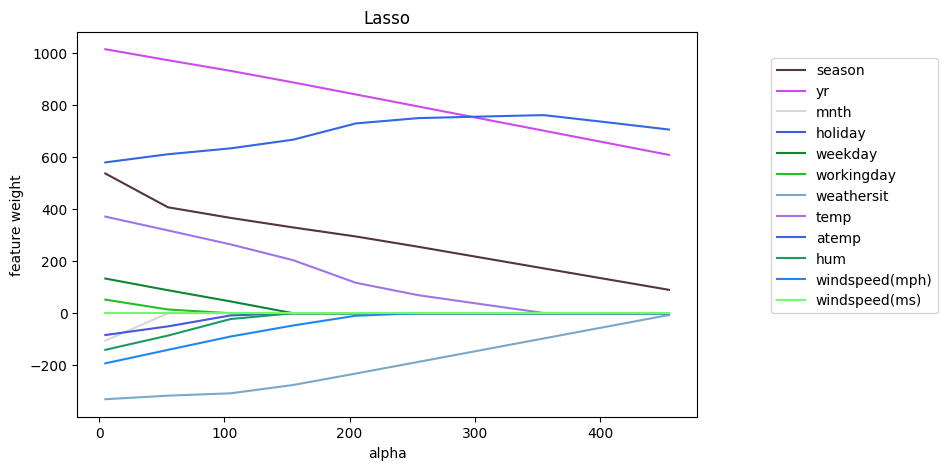

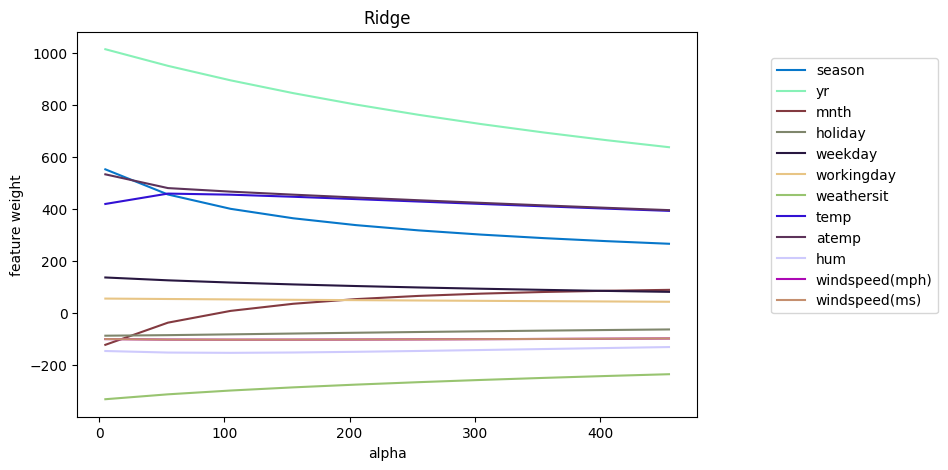

In [174]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?  
Відповідь: Lasso  
Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.  
Відповідь: Це означає, що цей признак був повністю "виключений" з моделі у процесі регуляризації.  
Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем меньше $10^{-3} $  
Відповідь: Так, можна стверджувати тот факт, що Lasso зменьшує цей параметр до нуля при alpha > 0. А ле Ridge більш схильна до зменшення впливу признаків, а не до їх повного виключення, навіть при великому alpha  
Какой из регуляризаторов подойдет для отбора неинформативных признаков?  
Для відбору неінформативних признаків краще підходить регуляризатор L1, відомий як лассо-регресія (Lasso regression). Особливістю L1-регуляризації є те, що вона може звести вагу неінформативних (або менш важливих) признаків до нуля, фактично виключаючи їх з моделі.   

In [186]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = data["x"]
    y = data["y"]
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #x_ticks = np.concatenate((np.arange(0, 11, 2),np.arange(10, 101, 5))) 
    #plt.xticks(x_ticks)
    plt.grid()
    plt.show()

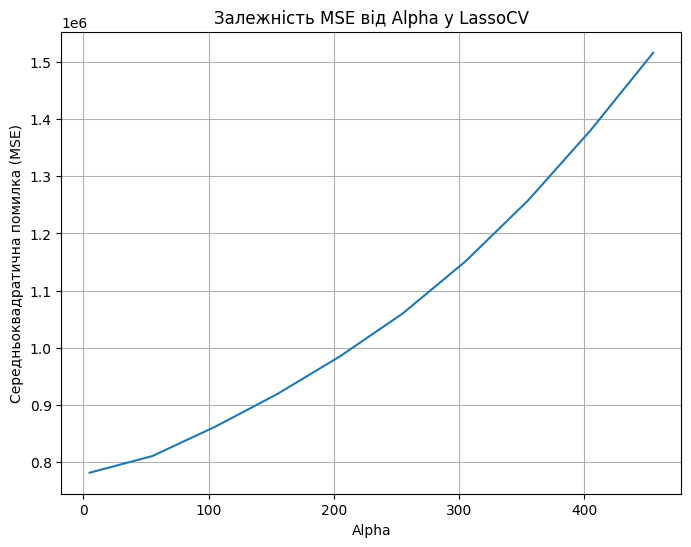

Обране alpha: 5
Оптимальні ваги:
season: 538.0
yr: 1016.0
mnth: -106.0
holiday: -84.0
weekday: 133.0
workingday: 52.0
weathersit: -331.0
temp: 372.0
atemp: 580.0
hum: -141.0
windspeed(mph): -193.0
windspeed(ms): -0.0


In [187]:
# Створення та навчання моделі Lasso регресії
lasso_cv = LassoCV(alphas=alphas, cv=3)
lasso_cv.fit(X, y)

# Створення DataFrame для MSE
mse_mean = pd.DataFrame(lasso_cv.mse_path_.mean(axis=1), index=lasso_cv.alphas_, columns=['Mean_MSE'])
mse_mean.index.name = 'alpha'
mse_mean = mse_mean.sort_index()

# Виведення графіка
plot_data = {"x": mse_mean.index, "y": mse_mean["Mean_MSE"]}
create_plot(plot_data, 'Залежність MSE від Alpha у LassoCV', 'Alpha', 'Середньоквадратична помилка (MSE)', figsize=(8, 6))

# Виведення обраного alpha
print("Обране alpha:", lasso_cv.alpha_)

# Виведення оптимальних ваг
print("Оптимальні ваги:")
optimal_weights = list(zip(data.columns, lasso_cv.coef_.round(0)))

for feature, weight in optimal_weights:
    print(f"{feature}: {weight}")


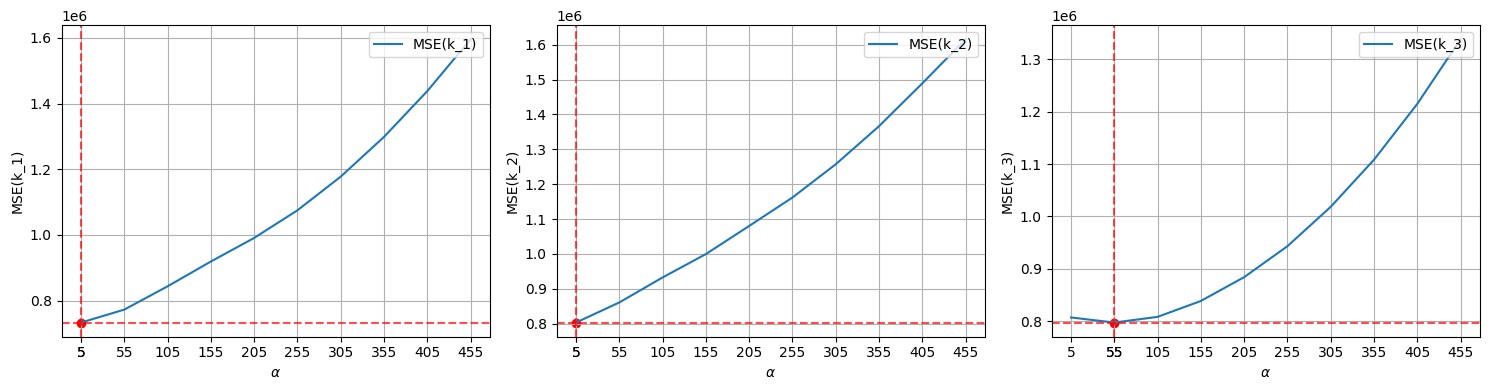

In [195]:
# Створення DataFrame для mse_path_
mse = pd.DataFrame(lasso_cv.mse_path_, index=lasso_cv.alphas_)
mse.index.name = 'alpha'
mse.columns = [f'k_{i+1}' for i in range(lasso_cv.mse_path_.shape[1])]

# Знаходження мінімальних значень MSE та відповідних alpha для кожного розбиття
min_indices = mse.idxmin()

# Візуалізація
fig, axes = plt.subplots(1, mse.shape[1], figsize=(15, 4))

for i, col in enumerate(mse.columns):
    min_alpha = min_indices[col]
    min_mse = mse.at[min_alpha, col]

    axes[i].plot(mse.index, mse[col], label=f"MSE({col})")
    axes[i].axvline(x=min_alpha, color='red', linestyle='--', alpha=0.7)
    axes[i].axhline(y=min_mse, color='red', linestyle='--', alpha=0.7)
    axes[i].scatter(min_alpha, min_mse, color='red')

    axes[i].set_xlabel(r"$\alpha$")
    axes[i].set_ylabel(f"MSE({col})")
    axes[i].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
    axes[i].grid(which="both")
    axes[i].legend(loc='upper right')

    # Налаштування міток для осі X
    main_ticks = np.arange(5, 500, 50)
    all_ticks = np.sort(np.concatenate((main_ticks, [min_alpha])))
    axes[i].set_xticks(all_ticks)

plt.tight_layout()
plt.show()

In [217]:
# Отримання коефіцієнтів моделі
coefficients = lasso_cv.coef_

# Створення DataFrame для зручності аналізу
coef_df = pd.DataFrame({
    'Feature': data.columns[:-1], 
    'Coefficient': coefficients
})

# Перевірка, чи довжини списків співпадають
assert len(data.columns[:-1]) == len(coefficients), "Розмір коефіцієнтів не співпадає з кількістю признаків"

# Вибір 4 признаків 
top_features = coef_df[coef_df['Coefficient'] > 0].nlargest(4, 'Coefficient')

print(top_features)

  Feature  Coefficient
1      yr  1015.940898
8   atemp   580.443711
0  season   537.663473
7    temp   371.796493


1 Так Залежність проглядаєтьс, хоча для показників для року аномальна  
2 Так, до певної міри ця залежність спрацьовує, але у досягнувши максимуму у своїх показниках залежність падає

In [219]:
# Обчислення модулю коефіцієнтів та вибір від'ємних
coef_df['abs_Coefficient'] = coef_df['Coefficient'].abs()
negative_coef_df = coef_df[coef_df['Coefficient'] < 0]

# Вибір 3 признаків з найбільшими за модулем від'ємними коефіцієнтами
top_negative_features = negative_coef_df.nlargest(3, 'abs_Coefficient')[['Feature', 'Coefficient']]

print(top_negative_features)

           Feature  Coefficient
6       weathersit  -330.921742
10  windspeed(mph)  -192.844615
9              hum  -140.831953


Так, таке ствердження відповідає дійсності

In [220]:
near_zero_features = coef_df[coef_df['Coefficient'].abs() < 1e-3]

print(near_zero_features)

          Feature   Coefficient  abs_Coefficient
11  windspeed(ms) -2.711482e-08     2.711482e-08


Алгоритм могла виключити такі данні з збудованої моделі за таких ознак:  
1 Незначущість Признаків ( коефіціенти дуже малі )  
2 Колініарність ( сильно корелює з іншими признаками )  
3 Шумові данні ( признак не містить корисної інформації)